# Fashion MNIST

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

C:\Users\DELL\anaconda3\envs\tf-gpu-dl\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\anaconda3\envs\tf-gpu-dl\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\anaconda3\envs\tf-gpu-dl\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\anaconda3\envs\tf-gpu-dl\lib\site-packages\tensorf

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_img, training_lbls) , (test_img, test_lbls) = mnist.load_data()

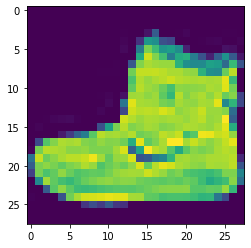

In [5]:
np.set_printoptions(linewidth = 200)
import matplotlib.pyplot as plt
plt.imshow(training_img[0])

In [6]:
# normalising images
training_img = training_img / 255.0
test_img = test_img / 255.0

## Model 1
First, the image is flattened. Then we have put a fully connected layer and finally we have the softmax function

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(120, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(training_img, training_lbls, epochs=5)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5011 - acc: 0.8254
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3741 - acc: 0.8660
Epoch 3/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3362 - acc: 0.8792
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3132 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2947 - acc: 0.8925


In [10]:
model.evaluate(test_img, test_lbls)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3671 - acc: 0.8640


[0.36709502456188203, 0.864]

## Model 2 - using callbacks

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.6):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True
            
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0 
x_test = x_test / 255.0

callbacks = myCallback()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = tf.keras.optimizers.Adam(), 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
59680/60000 [============================>.] - ETA: 0s - loss: 0.4754 - acc: 0.8295
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 10s 173us/sample - loss: 0.4753 - acc: 0.8295


## Model 3 - using CNN

In [14]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train , x_test = x_train.reshape(60000, 28, 28, 1) , x_test.reshape(10000,28,28,1)
x_train , x_test = x_train / 255.0 , x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=5)

test_loss = model.evaluate(x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total para